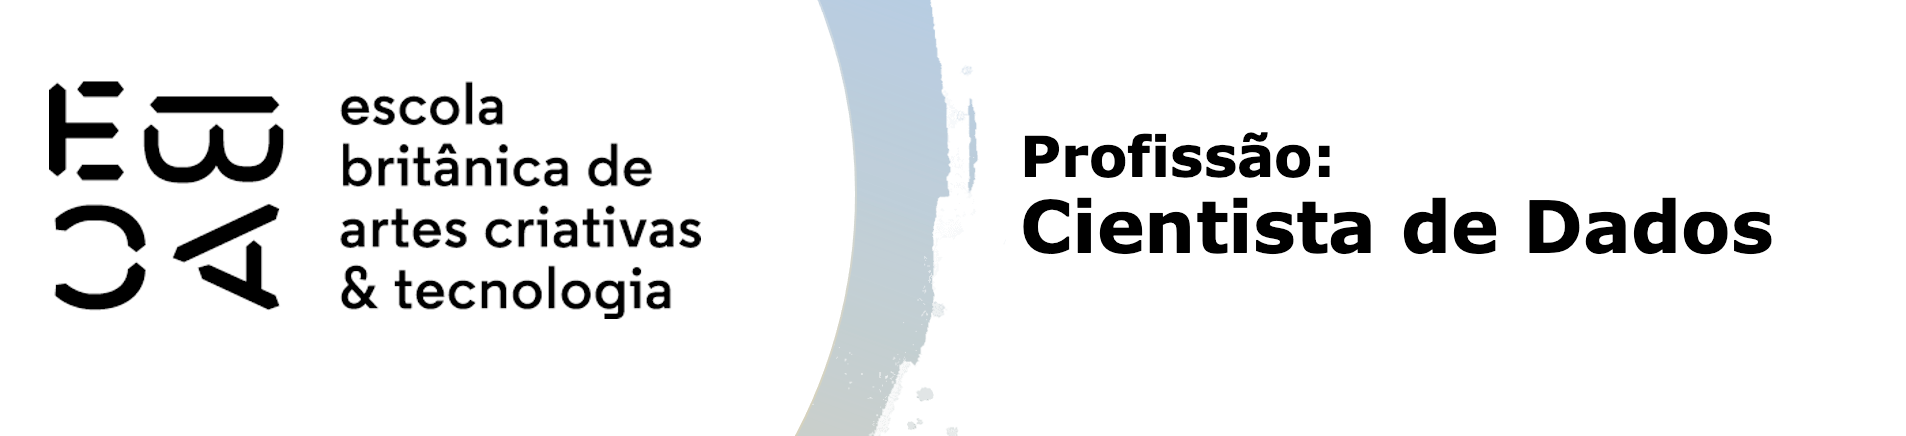

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.nunique(axis=0)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

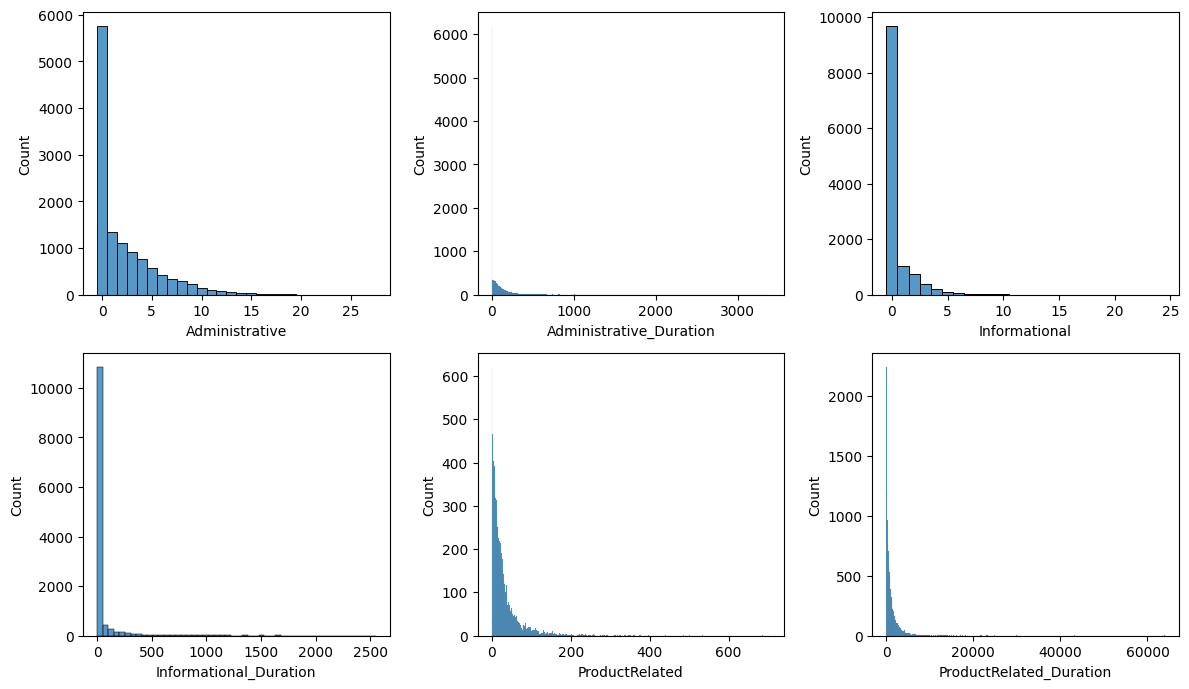

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(12, 7))

sns.histplot(data=df, x="Administrative", discrete=True, ax=axs[0, 0])
sns.histplot(data=df, x="Administrative_Duration", ax=axs[0, 1])
sns.histplot(data=df, x="Informational", discrete=True, ax=axs[0, 2])
sns.histplot(data=df, x="Informational_Duration", bins=50, ax=axs[1, 0])
sns.histplot(data=df, x="ProductRelated", discrete=True, ax=axs[1, 1])
sns.histplot(data=df, x="ProductRelated_Duration", ax=axs[1, 2])

plt.tight_layout()
plt.show()

In [12]:
# Verificando valores missing

df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [13]:
variaveis = ["Administrative", "Administrative_Duration", "Informational", 
             "Informational_Duration", "ProductRelated", "ProductRelated_Duration"]

df_pad = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns = df[variaveis].columns)
df_pad.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430


### Explorando informações com o Elbow Method

In [15]:
SQD = []
K = range(1,15)
for k in tqdm(K):
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(df_pad)
    SQD.append(km.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]

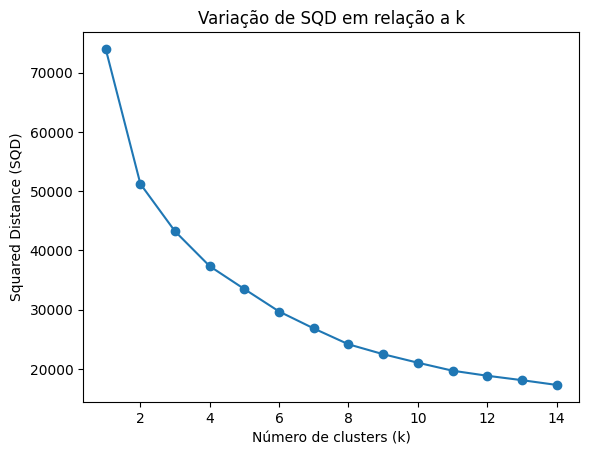

In [16]:
plt.plot(K, SQD, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Squared Distance (SQD)')
plt.title('Variação de SQD em relação a k')
plt.show()

In [19]:
elbow_data = pd.DataFrame({'k': K, 'SQD': SQD})
print(elbow_data)

     k           SQD
0    1  73980.000000
1    2  51210.526274
2    3  43201.941852
3    4  37326.398856
4    5  33467.671203
5    6  29687.955775
6    7  26826.420971
7    8  24156.916324
8    9  22486.584439
9   10  21050.033419
10  11  19704.492990
11  12  18851.227931
12  13  18108.188943
13  14  17305.059440


Observando os resultados obtidos, podemos observar uma queda acentuada no SQD à medida que o número de clusters aumenta de 1 para 2 e de 2 para 3. No entanto, à medida que o número de clusters continua a aumentar, o ganho na redução do SQD diminui gradualmente.

Nesse caso, o "cotovelo" do gráfico está em torno de 3 ou 4 clusters, onde a queda no SQD começa a se tornar menos acentuada, indicando que essa seria a quantidade de clusters interessante para a análise.

### Explorando informações com o Silhouette Coefficient Method

In [20]:
df_pad = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns = df[variaveis].columns)

In [29]:
silhuetas = []

# Quantidade máxima de grupos a ser testada
max_clusters = 10

for n_clusters in tqdm(range(2, max_clusters+1)):
    km = KMeans(n_clusters=n_clusters, n_init=10).fit(df_pad)
    silhuetas.append(silhouette_score(df_pad, km.labels_))

  0%|          | 0/9 [00:00<?, ?it/s]

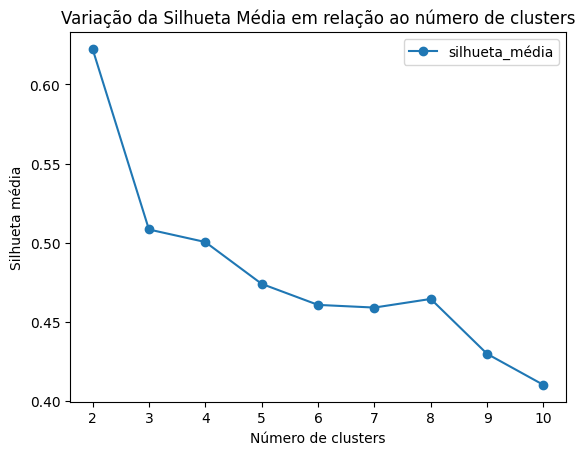

In [36]:
df_silhueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silhueta_média': silhuetas})

df_silhueta.plot.line(x='n_clusters', y='silhueta_média', marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhueta média')
plt.title('Variação da Silhueta Média em relação ao número de clusters')
plt.show()

In [37]:
df_silhueta

,n_clusters,silhueta_média
0,2,0.622424
1,3,0.508384
2,4,0.500468
3,5,0.474043
4,6,0.460762
5,7,0.459072
6,8,0.464523
7,9,0.429830
8,10,0.410219


Podemos observar que a silhueta média é mais alta quando o número de clusters é igual a 2, com um valor de 0.622424. No entanto, também podemos ver que há um valor relativamente alto de silhueta média quando o número de clusters é igual a 3, com um valor de 0.508384.

Portanto, com base nos dados observados, tanto 2 quanto 3 clusters podem ser considerados interessantes, podendo ampliar a análise com até 4 clusers.

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

### Verificação com 2 clusters

In [132]:
df_pad = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns = df[variaveis].columns)

cluster_2 = KMeans(n_clusters=2, n_init=2)
cluster_2.fit_predict(df_pad)

df_pad['clusters_2'] = pd.Categorical(cluster_2.labels_)

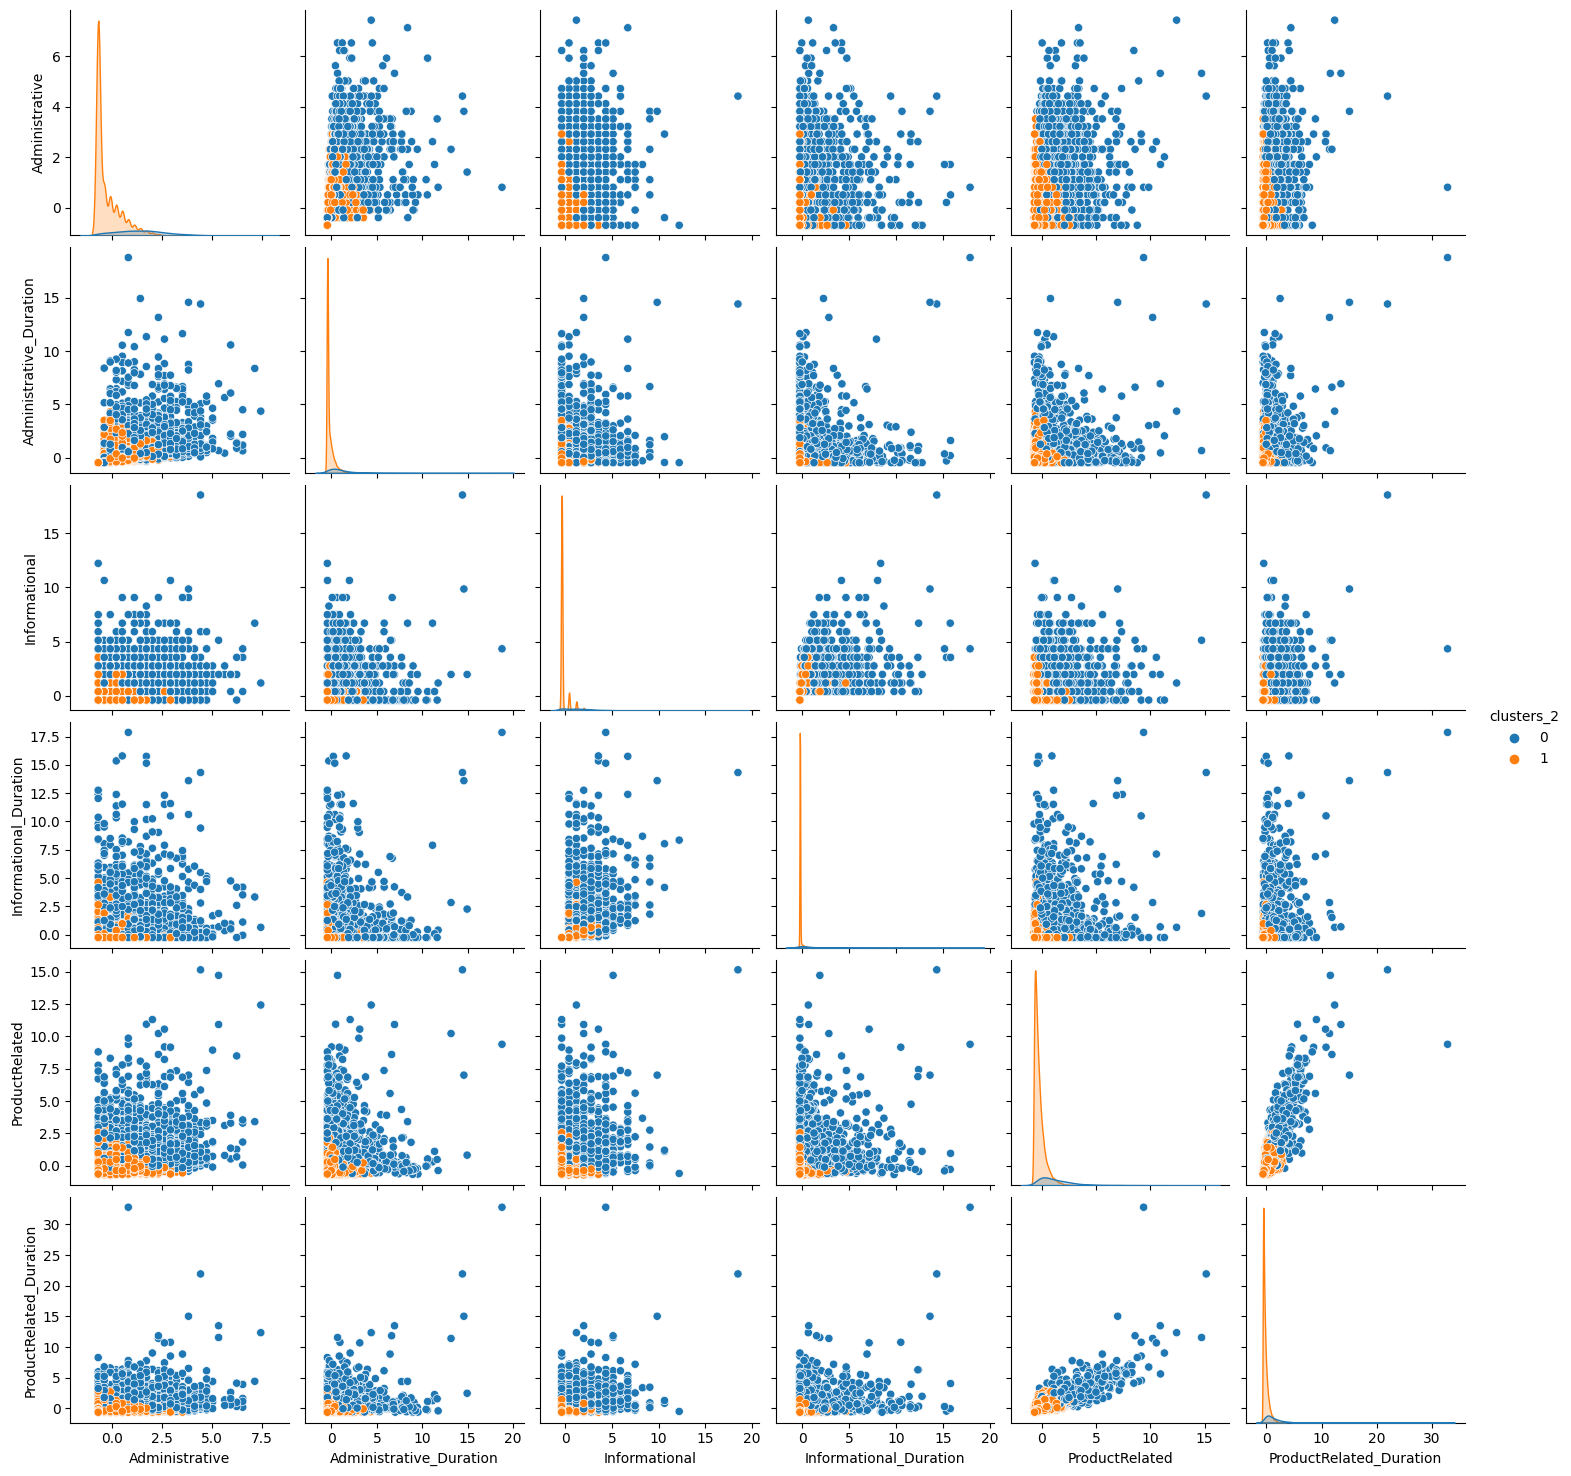

In [133]:
sns.pairplot(df_pad, hue='clusters_2')

### Verificação com 3 clusters

In [143]:
cluster_3 = KMeans(n_clusters=3, n_init=10)
cluster_3.fit_predict(df_pad)

df_pad['clusters_3'] = pd.Categorical(cluster_3.labels_)

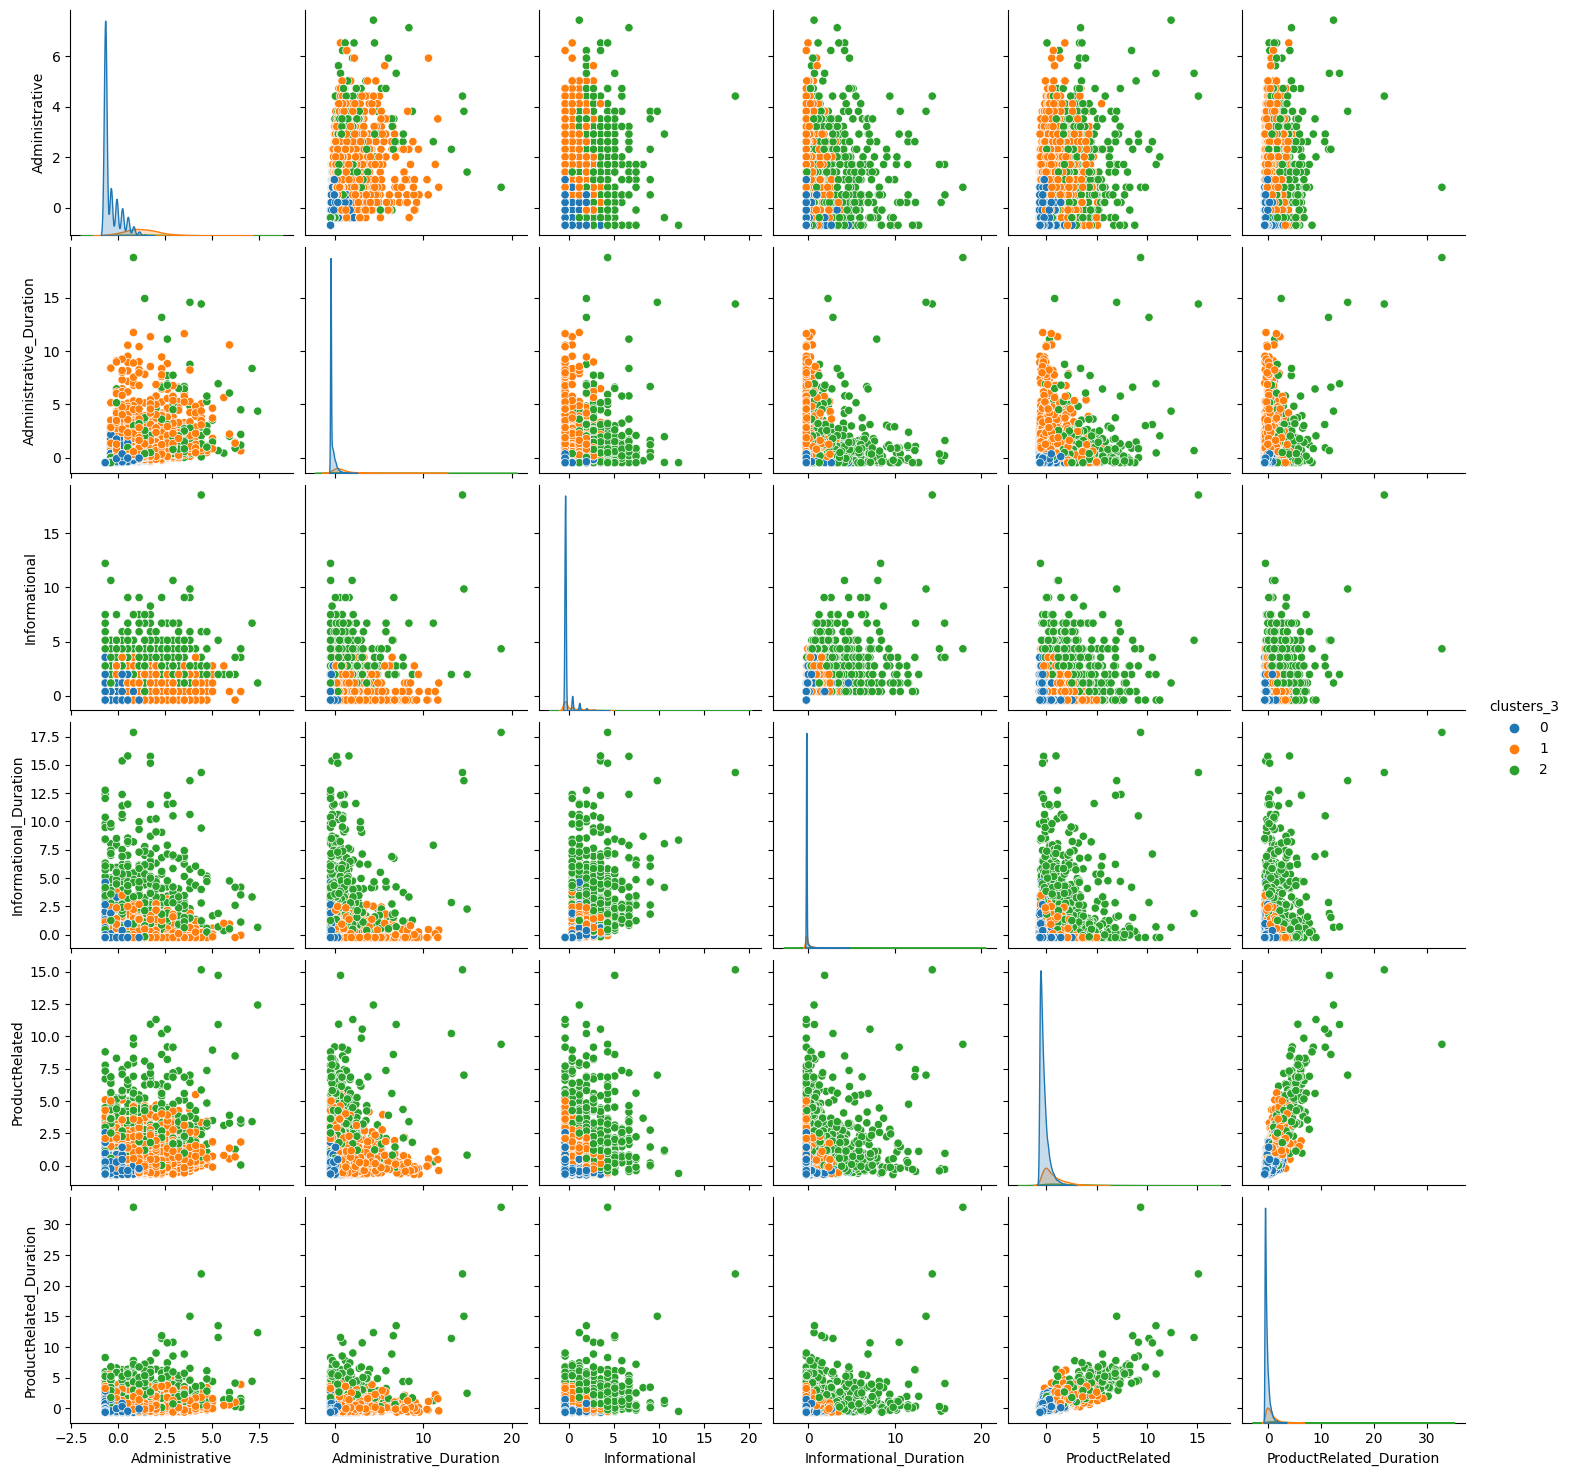

In [144]:
sns.pairplot(df_pad, hue='clusters_3')

### Verificação com 4 clusters

In [181]:
cluster_4 = KMeans(n_clusters=4, n_init=10)
cluster_4.fit_predict(df_pad)

df_pad['clusters_4'] = pd.Categorical(cluster_4.labels_)

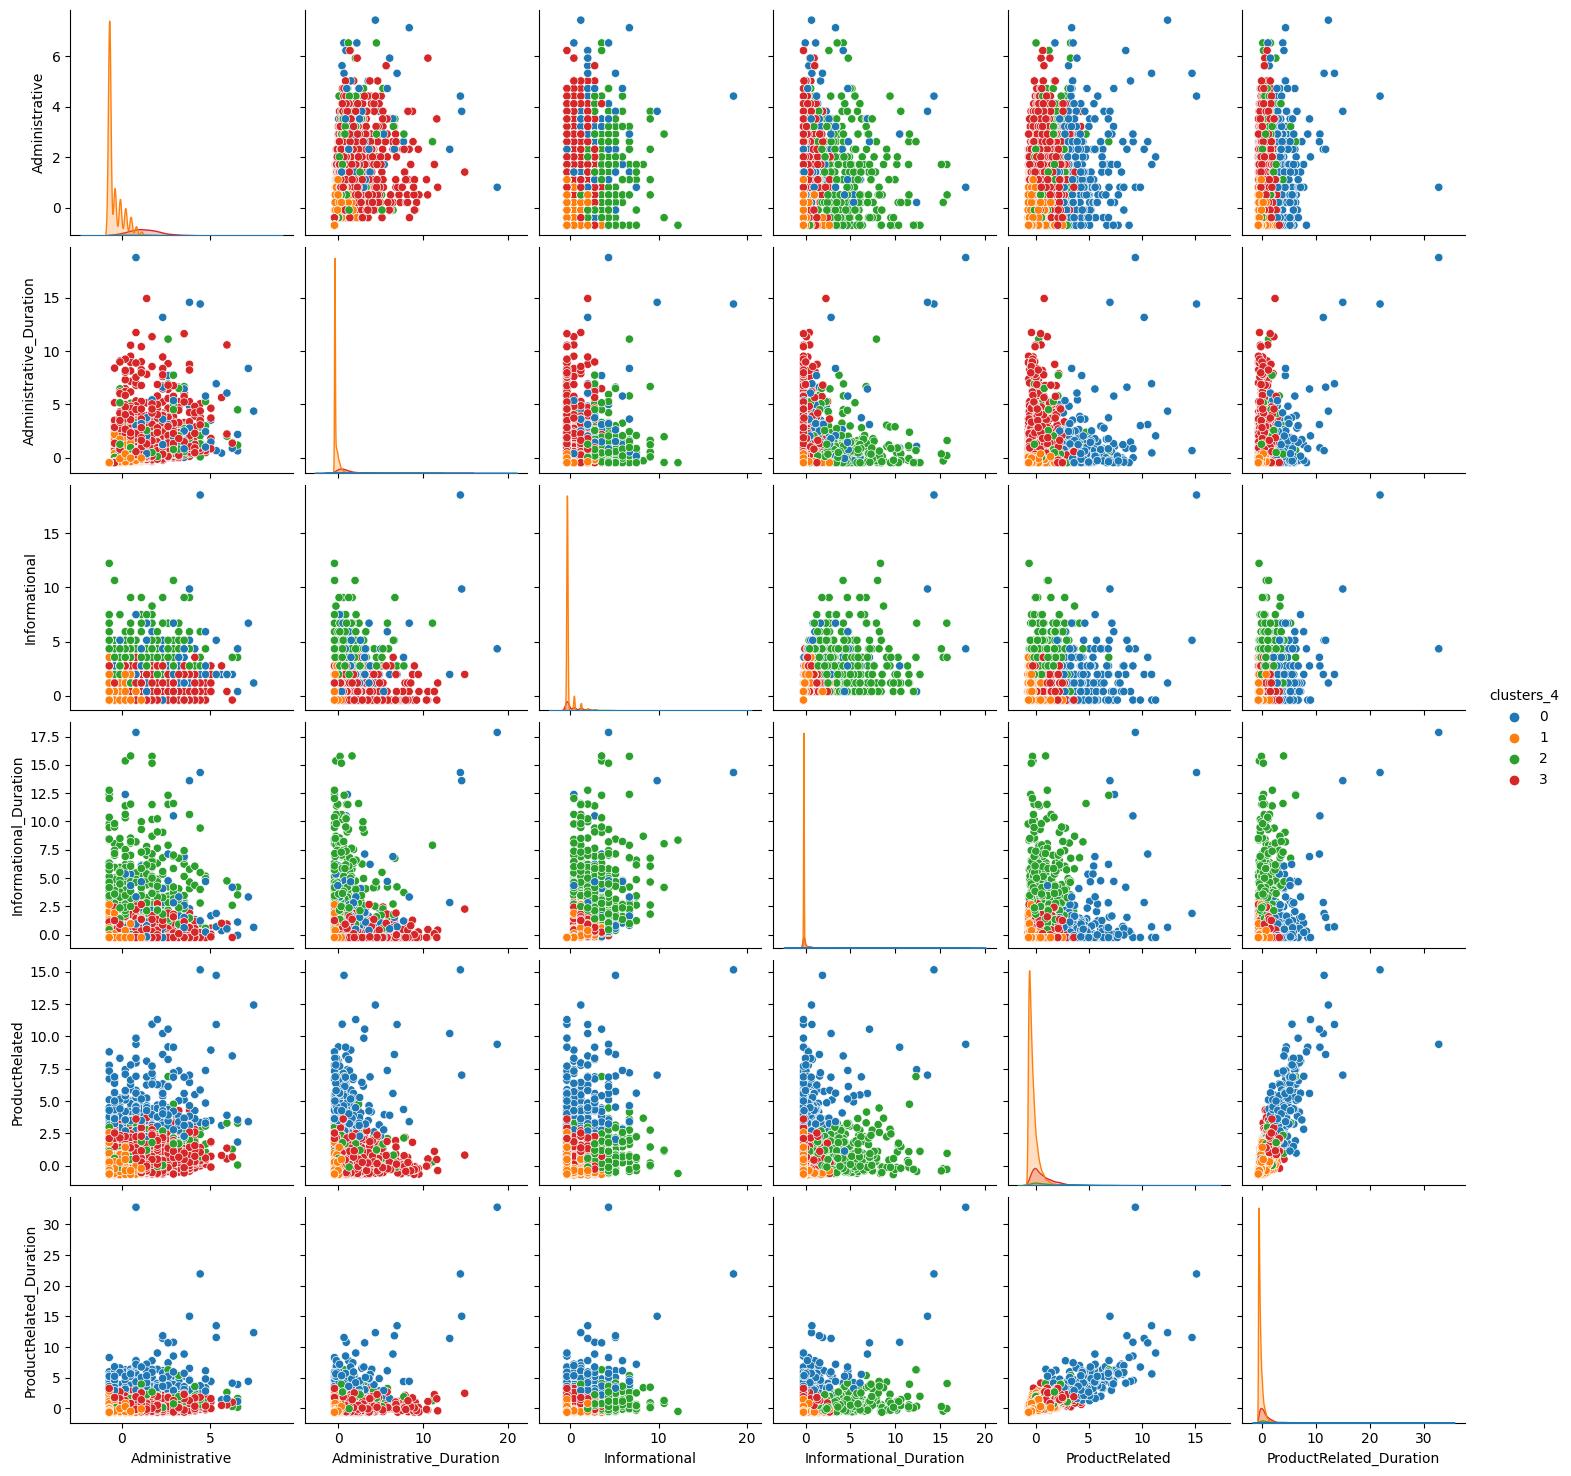

In [182]:
sns.pairplot(df_pad, hue='clusters_4')

In [183]:
df_2_clusters = pd.DataFrame({'clusters_2': cluster_2.labels_})
df_3_clusters = pd.DataFrame({'clusters_3': cluster_3.labels_})
df_4_clusters = pd.DataFrame({'clusters_4': cluster_4.labels_})

df_results = pd.concat([df_pad, df_2_clusters, df_3_clusters, df_4_clusters], axis=1)
df_results

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,clusters_2,clusters_3,clusters_4,clusters_2,clusters_3,clusters_4
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,1,0,1,1,0,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,1,0,1,1,0,1
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,1,0,1,1,0,1
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,1,0,1,1,0,1
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,1,0,1,1,0,1
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,1,0,1,1,0,1
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1,0,1,1,0,1
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,1,0,1,1,0,1


In [184]:
print(df_results['clusters_2'].shape)
print(df_results['clusters_3'].shape)
print(df_results['clusters_4'].shape)

(12330, 2)
(12330, 2)
(12330, 2)


In [185]:
# Contagem de observações em cada cluster para cada quantidade de clusters considerada
count_2_clusters = df_results['clusters_2'].iloc[:, 0].value_counts()
count_3_clusters = df_results['clusters_3'].iloc[:, 0].value_counts()
count_4_clusters = df_results['clusters_4'].iloc[:, 0].value_counts()

# Imprimir resumo geral
print("Resumo geral para 2 clusters:")
print(count_2_clusters)

print("\nResumo geral para 3 clusters:")
print(count_3_clusters)

print("\nResumo geral para 4 clusters:")
print(count_4_clusters)

Resumo geral para 2 clusters:
clusters_2
1    10578
0     1752
Name: count, dtype: int64

Resumo geral para 3 clusters:
clusters_3
0    9505
1    2280
2     545
Name: count, dtype: int64

Resumo geral para 4 clusters:
clusters_4
1    9497
3    2166
2     409
0     258
Name: count, dtype: int64


### Conclsões

Ao verificar todos os dados obtidos, podemos observar que:

#### Com 2 clusters:
- O cluster 1 possui uma contagem significativamente maior (10578) em comparação com o cluster 0 (1752). Isso indica uma clara divisão entre os padrões de observação dos dois clusters.

#### Com 3 clusters:
- O cluster 0 possui a contagem mais alta (9505), seguido pelo cluster 1 (2280) e pelo cluster 2 (546). Isso indica uma divisão mais equilibrada entre os padrões de observação dos três clusters, com um cluster dominante (cluster 0) e outros dois clusters menores (cluster 1 e cluster 2).

#### Com 4 clusters:
- O cluster 1 tem a contagem mais alta (9497), seguido pelo cluster 3 (2166), cluster 2 (409) e cluster 0 (258). Isso mostra uma distribuição desigual dos padrões de observação entre os quatro clusters, com um cluster dominante (cluster 1) e os outros três clusters com contagens menores.

A escolha do número de clusters pode depender dos objetivos específicos a serem estudados. Caso o desejável seja uma divisão clara e distintiva dos padrões de observação, o mais adequado seria a divisão em 2 clusters. Se houver nuances e variações adicionais nos dados, 3 ou 4 clusters podem fornecer uma visão mais detalhada dessas variações.

Para dar prosseguimento a esta atividade, foi escolhida a divisão em 4 clusters, sendo que:

- No cluster 0, a maioria das observações possui os atributos "administrativo" e "produtos" como False, enquanto os atributos "pouco_acesso" e "informativo" são predominantemente True. Isso sugere um perfil de clientes com baixa atividade administrativa, pouco acesso aos serviços/produtos e uma **necessidade de informações mais frequentes**.

- No cluster 1, a maioria das observações possui os atributos "administrativo", "pouco_acesso" e "informativo" como True, enquanto o atributo "produtos" é predominantemente False. Isso indica um perfil de clientes com alta atividade administrativa, **bom acesso aos serviços/produtos e uma necessidade reduzida de informações**.

- No cluster 2, a maioria das observações possui os atributos "administrativo", "pouco_acesso" e "informativo" como False, enquanto o atributo "produtos" é predominantemente True. Isso sugere um perfil de clientes com **baixa atividade administrativa, pouco acesso aos serviços/produtos e uma menor necessidade de informações**.

- No cluster 3, a maioria das observações possui os atributos "administrativo" e "informativo" como False, enquanto os atributos "pouco_acesso" e "produtos" são predominantemente True. Isso indica um perfil de clientes com **alta atividade administrativa**, acesso limitado aos serviços/produtos e uma menor necessidade de informações.

#### Atribuindo nomes aos grupos, conforme suas características

In [210]:
df_pad['clusters_4'].replace({0:"informativo", 1:"produtos", 2:"pouco_acesso", 3:"administrativo"}, inplace=True)

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [211]:
df_pad['BounceRates'] = df['BounceRates']
df_pad['Revenue'] = df['Revenue']

#### BounceRates

<Axes: xlabel='BounceRates', ylabel='clusters_4'>

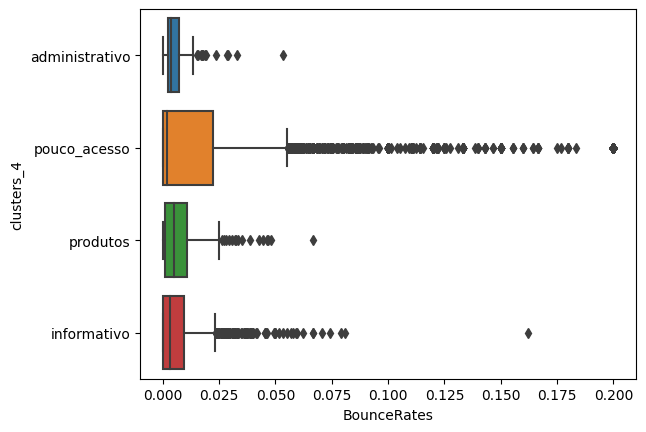

In [212]:
sns.boxplot(data=df_pad, y='clusters_4', x='BounceRates')

In [213]:
bounce_rate_stats = df_pad.groupby('clusters_4')['BounceRates'].describe()
bounce_rate_text = bounce_rate_stats.to_string()
print(bounce_rate_text)

                 count      mean       std  min       25%       50%       75%       max
clusters_4                                                                             
administrativo   258.0  0.005486  0.005781  0.0  0.002293  0.003805  0.007248  0.053355
pouco_acesso    9497.0  0.026837  0.054147  0.0  0.000000  0.001961  0.022222  0.200000
produtos         409.0  0.007545  0.008931  0.0  0.001143  0.004910  0.010811  0.066667
informativo     2166.0  0.006579  0.009883  0.0  0.000000  0.003478  0.009372  0.161905


#### Revenue

In [214]:
pd.crosstab(df_pad.Revenue, df_pad.clusters_4)

clusters_4,administrativo,pouco_acesso,produtos,informativo
Revenue,,,,
False,172,8302,300,1648
True,86,1195,109,518


In [215]:
# Porcentagem de True e False por coluna
pd.crosstab(df_pad.Revenue, df_pad.clusters_4, normalize='columns')

clusters_4,administrativo,pouco_acesso,produtos,informativo
Revenue,,,,
False,0.666667,0.874171,0.733496,0.760849
True,0.333333,0.125829,0.266504,0.239151


### Conclusão
O grupo que possui clientes com maior propensão de compra é o grupo 1 nomeado como produtos, pois possui maior porcentagem de compra nesse grupo e possui menores valores de Bounce Rate.